# 手写数字识别
使用MNIST数据集，大型的包含手写数字图片的数据集，由0-9手写数字图片组成，共10个类别，每张图片大小28*28。黑白图片为单通道。

In [2]:
# 加载库，使用tensorflow
# tensorflow提供了关于手写数字识别相关的类型，通过input_data可以方便的获取手写数字数据集
# 并且进行手写数字识别的任务
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [4]:
# 读取数据集，第一个参数指定数据集的位置，指定路径没有数据集则自动下载
# 如果指定路径数据集已经存在，则直接读取并返回数据集对象
# 第二个参数one_hot指定是否以one_hot编码形式进行返回（指定的标签0-9），有利于训练
# http://yann.lecun.com/exdb/mnist/
mnist = input_data.read_data_sets("data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


In [12]:
# MNIST共70k张图片，train_set有60k张，test_set有10k张。train_set包括55k训练图像和5k验证图像
# MNIST图像为单通道，即黑白图片。将28*28图片拉伸成一维存储，将每张图像的形状存储为(784.)
# 训练集
display(mnist.train.images.shape)
display(mnist.train.labels.shape)
display(mnist.train.labels[0])
# type(mnist.train.images) numpy.ndarray
# 验证集
display(mnist.validation.images.shape)
display(mnist.validation.labels.shape)
# 测试集
display(mnist.test.images.shape)
display(mnist.test.labels.shape)

(55000, 784)

(55000, 10)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

(5000, 784)

(5000, 10)

(10000, 784)

(10000, 10)

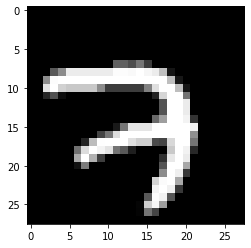

In [13]:
# 通过matplotlib库显示指定的图像，将图片型状结构(784.)重构为(28,28)
plt.imshow(mnist.train.images[0].reshape((28,28)),cmap="gray")

## 单层神经网络
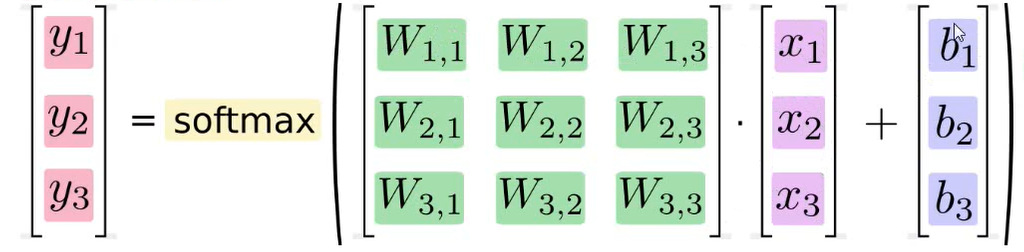

In [19]:
# 神经网络进行分类任务，使用softmax
# 有几个分类，输出层就有几个神经元（labels数量为10，即10个神经元）
# 每个神经元表示属于特定类别的概率。最终分类为概率值最大的那个
# softmax最后一层的神经元净输入得到的就是属于每个类别的分值（logits），通过softmax激活函数将分值转为概率值

# 使用tensorflow构建神经网络

# 定义占位符，接收输入数据
# dtype: 指定元素的类型
# shape: 张量的形状，None表示可以是任意长度
# Input
X = tf.placeholder(dtype = tf.float32, shape=[None,784])
# Output
y = tf.placeholder(dtype = tf.float32, shape=[None,10])

# 单层神经网络，权重初始化没那么重要

# 对图像中存储的数值进行加权求和，得到每个类别的分值
# 通过softmax激活函数将分值转换为属于某个类别的概率

# 定义tensorflow变量，表示模型中的参数
W = tf.Variable(tf.zeros(shape=[784,10]))
b = tf.Variable(tf.zeros(shape=[1,10]))

# 矩阵点乘运算
z = tf.matmul(X,W) + b

# softmax激活函数转换为概率值
a = tf.nn.softmax(z)

# 定义损失函数，MSE用于连续值损失，不使用离散值
# 交叉熵损失函数
loss = -tf.reduce_sum(y * tf.log(a))

# 梯度下降优化器，对神经网络进行训练
# 0.01是学习率
# minimize让损失值最小化
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
# 相等返回True，否则返回False
correct = tf.equal(tf.argmax(y,axis=1),tf.argmax(a,axis=1))
# tensorflow不能使用布尔类型的张量进行运算，需要类型转换
# 均值就是正确率
rate = tf.reduce_mean(tf.cast(correct,tf.float32))

# 定义会话，来进行求值
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        # 获取下一个样本批次数量
        batch_X, batch_y = mnist.train.next_batch(100)
        # feed_dict填充占位符张量的数据
        sess.run(train_step,feed_dict={X:batch_X, y:batch_y})
        # 每训练500次查看正确率
        if i % 500 == 0:
            print(sess.run(rate,feed_dict={X:mnist.test.images, y:mnist.test.labels}))

0.3082
0.9105
0.9027
0.9146
0.9172
0.92
0.9233
0.9144
0.9173
0.9187


## 改进：两层神经网络
采用中间加入隐藏层来实现

In [24]:
# 定义占位符
X=tf.placeholder(dtype=tf.float32,shape=[None,784])
y=tf.placeholder(dtype=tf.float32,shape=[None,10])

# 使用标准正态分布，初始化权重
# 隐藏层
W=tf.Variable(tf.random_normal(shape=[784,128],stddev=0.1))
b=tf.Variable(tf.zeros(shape=[1,128]))
z=tf.matmul(X,W)+b
# 输入小于0的赋为0，大于0的不变
a=tf.nn.relu(z)

# 第二层
W2=tf.Variable(tf.random_normal(shape=[128,10],stddev=0.05))
b2=tf.Variable(tf.zeros(shape=[1,10]))
z2=tf.matmul(a,W2)+b2
# 将分值转换为概率值
a2=tf.nn.softmax(z2)

# 损失函数
loss=-tf.reduce_sum(y*tf.log(a2))

# 梯度下降优化器，对神经网络进行训练
train_step=tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# 真实值与概率比较
correct = tf.equal(tf.argmax(y,axis=1),tf.argmax(a2,axis=1))

# 计算均值，即预测结果
rate=tf.reduce_mean(tf.cast(correct,tf.float32))

# 创建会话，进行求值
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5000):
        batch_X,batch_y=mnist.train.next_batch(100)
        sess.run(train_step,feed_dict={X:batch_X,y:batch_y})
        if i % 500 == 0:
            print(sess.run(rate,feed_dict={X:mnist.test.images,y:mnist.test.labels}))

0.3475
0.9648
0.9702
0.9757
0.98
0.9797
0.9817
0.9805
0.9819
0.9834
